# unit 1.7 - Professional training script

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/culurciello/deep-learning-course-source/blob/main/source/lectures/17-full-train_script_pytorch.ipynb)

Here we will look at a professional training script in pytorch

You can use this as a REFERENCE for all your projects!

DATASET:

this uses a small dataset used for learning neural networks

In [1]:
# PyTorch train script
# https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

# We will use the Fashion MNIST dataset: https://www.kaggle.com/datasets/zalando-research/fashionmnist

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

DATA:

It is always a good idea to take a look at the data in the dataset!

Inputs sample - image size: torch.Size([1, 28, 28])
Label: 1 

Inputs sample - min,max,mean,std: 0.0 1.0 0.28586435317993164 0.392581582069397
Inputs sample normalized - min,max,mean,std: -0.7281654477119446 1.8190758228302002 1.2468318821845514e-08 1.0


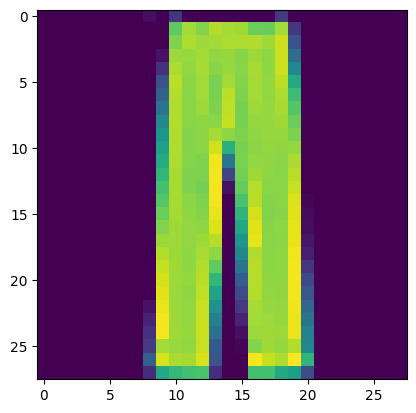

In [2]:
# let us print some data:

categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# select a random sample from the training set
sample_num = 143
# print(training_data[sample_num])
print('Inputs sample - image size:', training_data[sample_num][0].shape)
print('Label:', training_data[sample_num][1], '\n')

import matplotlib.pyplot as plt

ima = training_data[sample_num][0]
print('Inputs sample - min,max,mean,std:', ima.min().item(), ima.max().item(), ima.mean().item(), ima.std().item())
ima = (ima - ima.mean())/ ima.std()
print('Inputs sample normalized - min,max,mean,std:', ima.min().item(), ima.max().item(), ima.mean().item(), ima.std().item())
iman = ima.permute(1, 2, 0) # needed to be able to plot
plt.imshow(iman)

Looks like a pair of pants!

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(28*28, 512)
        self.l2 = nn.Linear(512, 512)
        self.l3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        output = self.l3(x)
        return output
    
# Can also be written as: 

# class Net(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.flatten = nn.Flatten()
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(28*28, 512),
#             nn.ReLU(),
#             nn.Linear(512, 512),
#             nn.ReLU(),
#             nn.Linear(512, 10),
#         )

#     def forward(self, x):
#         x = self.flatten(x)
#         output = self.linear_relu_stack(x)
#         return output


def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Let us now train the network

In [4]:
# training!

model = Net()

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

learning_rate = 1e-3
batch_size = 64

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.307564  [   64/60000]
loss: 2.293879  [ 6464/60000]
loss: 2.264424  [12864/60000]
loss: 2.260800  [19264/60000]
loss: 2.249522  [25664/60000]
loss: 2.214778  [32064/60000]
loss: 2.226152  [38464/60000]
loss: 2.183813  [44864/60000]
loss: 2.195374  [51264/60000]
loss: 2.149621  [57664/60000]
Test Error: 
 Accuracy: 38.6%, Avg loss: 2.150611 

Epoch 2
-------------------------------
loss: 2.172435  [   64/60000]
loss: 2.157539  [ 6464/60000]
loss: 2.085531  [12864/60000]
loss: 2.103842  [19264/60000]
loss: 2.059730  [25664/60000]
loss: 1.988892  [32064/60000]
loss: 2.028366  [38464/60000]
loss: 1.936597  [44864/60000]
loss: 1.962044  [51264/60000]
loss: 1.867358  [57664/60000]
Test Error: 
 Accuracy: 55.5%, Avg loss: 1.875786 

Epoch 3
-------------------------------
loss: 1.923206  [   64/60000]
loss: 1.884051  [ 6464/60000]
loss: 1.751750  [12864/60000]
loss: 1.798220  [19264/60000]
loss: 1.702788  [25664/60000]
loss: 1.641731  [32064/600

We can now test if the network was trained correctly:

In [5]:
sample_num = 143 # select a random sample

with torch.no_grad():
    r = model(training_data[sample_num][0])

print('neural network output pseudo-probabilities:', r)
print('neural network output class number:', torch.argmax(r).item())
print('neural network output, predicted class:', categories[torch.argmax(r).item()])


neural network output pseudo-probabilities: tensor([[ 2.6639,  6.3968, -0.6201,  4.9643,  1.1764, -3.7203,  0.9363, -4.5017,
         -2.9813, -3.1094]])
neural network output class number: 1
neural network output, predicted class: Trouser


## HOMEWORK:

Train your neural network with the same architecture for your own data. Get a few images of 3-4 categories of objects from the internet. Resize the images to square size 28x28 just like the example above. You can also modify your network to accept images of different sizes. An example of training data is [here](data/my_data.zip). You may want to have a `train/` folder and a `text/` folder just like in this example here. Train and test data are sets of the same categories of images, but with different images; train usually has a lot more than test. Use the [data loader](https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html) `torchvision.datasets.ImageFolder` instead of the `torchvision.datasets.FashionMNIST` one used above. 